<a href="https://colab.research.google.com/github/gtsagkatakis/OptimizationMethods_2024/blob/main/LS_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

# Load the California Housing Dataset
cal = fetch_california_housing()
df = pd.DataFrame(cal.data, columns=cal.feature_names)
df['PRICE'] = cal.target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Display basic statistics of the dataset
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Check for missing values
df.isnull().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
PRICE,0


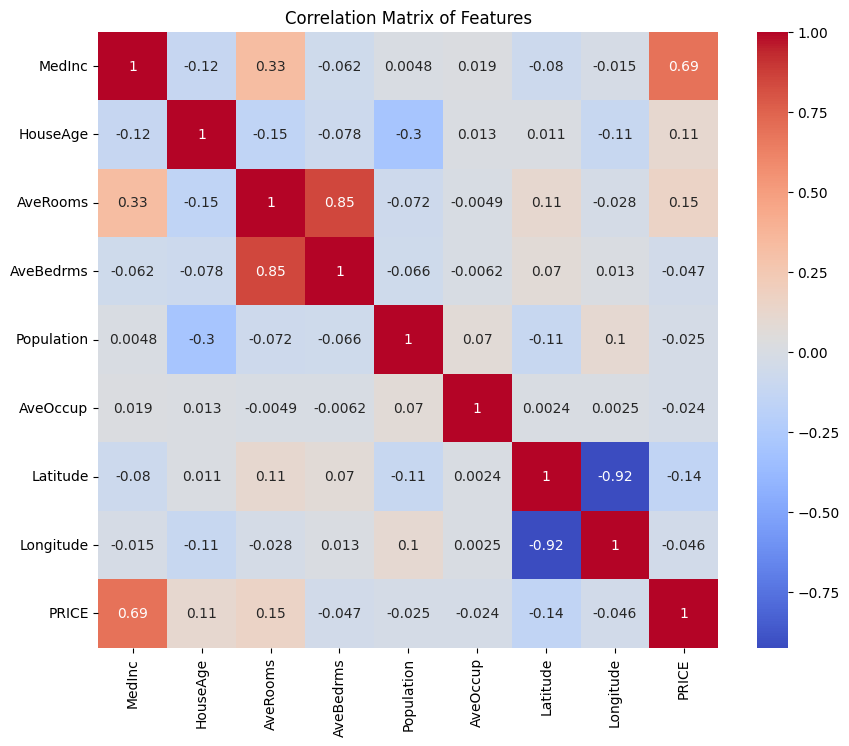

In [ ]:
# Display correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()


In [ ]:
# Use two features: AveRooms and MedInc
X = df[['AveRooms', 'HouseAge']]
y = df['PRICE']

# Add a bias term (column of ones) to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]



In [ ]:
# Normal equations formula: θ = (X^T X)^-1 X^T y
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("Parameters: ", theta)


Parameters:  [1.28591294 0.08030639 0.01210433]


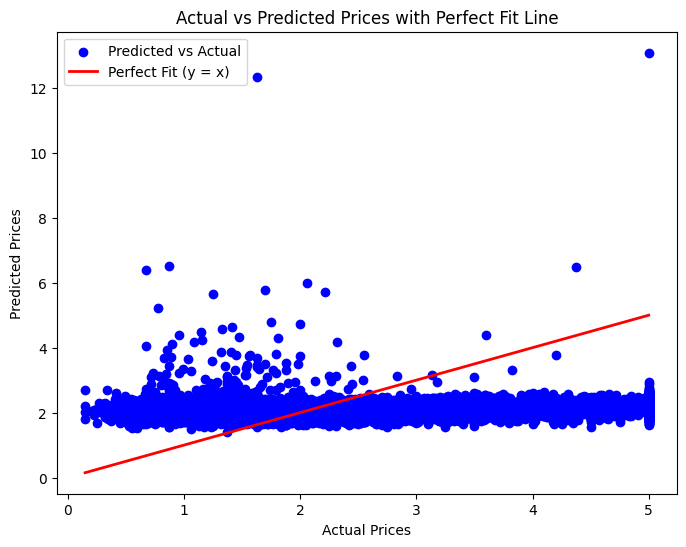

In [ ]:
# Predict house prices using the parameters
y_pred = X_b @ theta

# Plot actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, label="Predicted vs Actual", color="blue")

# Plot the perfect fit line (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2, label="Perfect Fit (y = x)")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices with Perfect Fit Line")
plt.legend()
plt.show()



Q1: Is the prediction accurate?

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 1.1306


Q2: Add another feature (e.g., MedInc) and analyze.

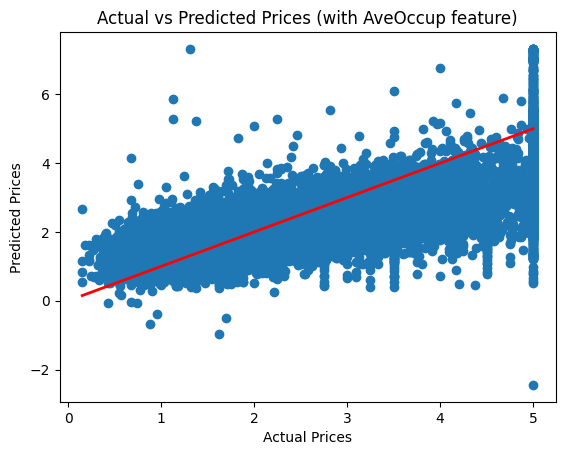

Root Mean Squared Error (RMSE): 0.8060


In [ ]:
# Adding another feature (AveOccup)
X_new = df[['AveRooms', 'HouseAge','MedInc']]
X_b_new = np.c_[np.ones((X_new.shape[0], 1)), X_new]

# Solve using normal equations
theta_new = np.linalg.inv(X_b_new.T @ X_b_new) @ X_b_new.T @ y
y_pred_new = X_b_new @ theta_new

# Plot the perfect fit line (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2, label="Perfect Fit (y = x)")

# Plot actual vs predicted with new feature
plt.scatter(y, y_pred_new)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (with AveOccup feature)")
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred_new))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

